# Libraries and data

In [1]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/3. Holt-Winters

/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/3. Holt-Winters


In [1]:
#libraries
import pandas as pd
import numpy as np

In [2]:
#get the data
data = pd.read_csv("airmiles.csv", index_col = "Date")
data.head()

,airmiles
Date,
1/1/1996,30983174
1/2/1996,32147663
1/3/1996,38342975
1/4/1996,35969113
1/5/1996,36474391


In [3]:
data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y")
data.head(2)    

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663


#Preparation

In [4]:
data = data.asfreq("MS")
data.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq='MS')

<AxesSubplot:xlabel='Date'>

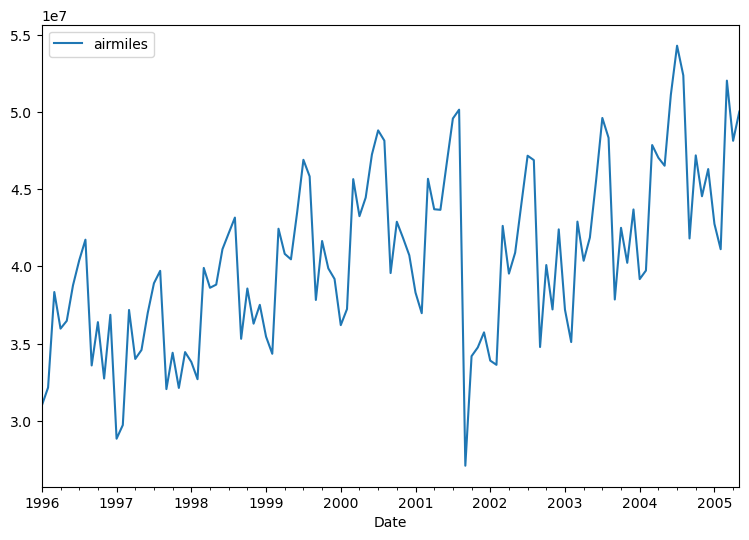

In [5]:
#Viz
data.plot(figsize = (9,6))

In [6]:
#training and test set
test_months = 12
training_set = data.iloc[:-test_months,:]
test_set = data.iloc[-test_months:,:]
test_set.head()

,airmiles
Date,
2004-06-01,51134050
2004-07-01,54317314
2004-08-01,52392985
2004-09-01,41816777
2004-10-01,47205665


#Holt Winters


In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(training_set['airmiles'],
                             trend = 'add',
                             seasonal = 'mul',
                             seasonal_periods = 12).fit()

/Users/nirali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [8]:
#predictions 
predictions = model.forecast(steps = 12).rename("HW")
predictions

2004-06-01    4.985031e+07
2004-07-01    5.224279e+07
2004-08-01    5.236168e+07
2004-09-01    4.136596e+07
2004-10-01    4.618046e+07
2004-11-01    4.350886e+07
2004-12-01    4.564370e+07
2005-01-01    4.123315e+07
2005-02-01    4.082851e+07
2005-03-01    5.023941e+07
2005-04-01    4.767275e+07
2005-05-01    4.818133e+07
Freq: MS, Name: HW, dtype: float64

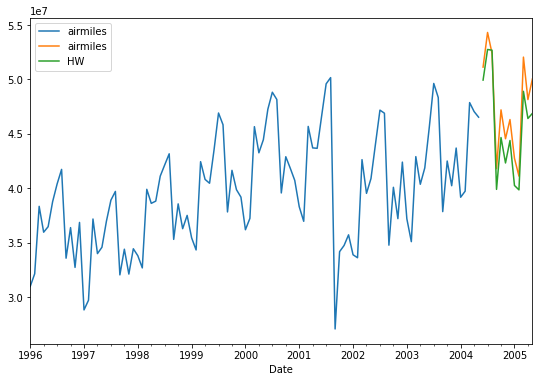

In [16]:
#plotting
training_set['airmiles'].plot(figsize = (9,6), legend = True)
test_set['airmiles'].plot(legend = True)
predictions.plot(legend = True)

In [17]:
#MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_set['airmiles'], predictions)

1955400.9405075114